# Fundamentos de Cartografia para SIG I - Conceitos

Para iniciarmos qualquer tratamento de dados geoespaciais, há cuidados fundamentais com a base cartográfica que devem ser incorporados no framework para garantir a qualidade das informações. Esses cuidados são baseados em geomática e geoestatística. Sabemos que a <b>cartografia <em>"preocupa-se em apresentar um modelo de representação de dados para os processos que ocorrem no espaço geográfico" (geomatica/UERJ)</em></b> e por isso é importante termos esses conceitos básicos incorporados na rotina de geoprocessamento. 

Nesse notebook vamos passar por alguns conceitos básicos necessários para preparação do projeto (trabalho que será executado e resultará num produto).

1. [Conceitos básicos de cartografia](#Conceitos-básicos-de-cartografia)
2. [Sistema de Informação Geográfica (SIG/GIS)](#Sistema-de-Informação-Geográfica-(SIG/GIS))
3. [Dados espaciais](#Dados-espaciais) 
4. [Projeções cartográficas](#Projeções-cartográficas) 
5. [Sistemas de coordenadas](#Sistemas-de-coordenadas) 
6. [Modelos de representação da terra - Datum](#Modelos-de-representação-da-terra-Datum) 
7. [Sistema de referência de coordenadas](#Sistema-de-referência-de-coordenadas)

In [2]:
# importando bibliotecas
import pandas as pd
import geopandas
import IPython.display as display
from shapely.geometry import Point, Polygon, LineString

%matplotlib inline

---
## Conceitos básicos de cartografia


---

**Cartografia** 

- <b><em>Conceito melhor aceito</b></em>: Associação Cartogr Cartográfica Internacional Internacional – ACI (1966) ACI (1966)
    - <em>“Conjunto de estudos e operações científicas, técnicas e artísticas que, tendo por base o resultado de observações diretas ou da análise da documentação, se voltam para a elaboração de mapas, cartas e outras formas de expressão e representação de objetos, fenômenos e ambientes físicos e sócio-econômicos, bem como sua utilização.”</em>[Conceitos de cartografia/INPE](http://www.dsr.inpe.br/vcsr/files/Apres_Cartografia.pdf)

**Cartografia sistemática ou de base**

-  <em>"Pode ser entendida como a atividade voltada para a representação do espaço com seus atributos dimensionais e de localização absoluta, através da execução de mapeamentos básicos a partir de levantamentos que podem ser topográficos, Aerofotogramétricos ou apoiados em imagens de satélites." </em>[A Cartografia: bases conceituais/UERB](http://www.ead.uepb.edu.br/ava/arquivos/cursos/geografia/leituras_cartograficas/Le_Ca_A02_B_WEB.pdf) 

**Tipos de Representação cartográfica**

- **Globo** (representação esférica)
- **Mapa** (representação plana)
    - pequena e média escala
- **Carta** (representação plana)
    - média e grande escala
    - mais detalhes
    - dividia em folhas 
- **Planta** (representação plana)
    - grande escala (maior que 1:1.000)
- **Cartografia digital**
    - Software gis, geoweb

---
### Elementos fundamentais de um mapa

---
### O que diferencia um mapa de outras representações gráficas?

- **Título, orientação (rodas dos ventos), grade de coordenadas, legenda (convenções cartográficas), escala, fonte.**

- Legenda: também chamada de Convenções cartográficas por causa dos simbolos que são comumente adotados.
- Escala pode ser gráfica, númerica, nominal

- Fonte: metadados, autoria do mapa, ano, fontes de origem

In [9]:
# GLOBO
display.IFrame('https://i.pinimg.com/originals/ce/37/4f/ce374f6cb4922c07409f8f99a60c3aea.gif', 
              700, 600)

In [16]:
display.IFrame('https://images-na.ssl-images-amazon.com/images/I/71YQ-46%2B4UL._AC_SY355_.jpg', 
              700, 360)

In [30]:
# MAPA
display.IFrame('https://flaviafeitosa.files.wordpress.com/2020/07/vinicius_cartgeo.jpg?w=958', 
              900, 630)

In [31]:
# Carta
display.IFrame('https://www.researchgate.net/profile/Jose_Kullberg/publication/277710627/figure/fig1/AS:294245433921541@1447164986797/Extracto-da-carta-geologica-de-Portugal-a-escala-1-50-000-folha-38-B-Setubal-LNEG-do.png', 
              900, 630)

In [33]:
# Carta
display.IFrame('https://www.todoestudo.com.br/wp-content/uploads/2016/08/carta-cartografica.jpg', 
              900, 630)

In [34]:
# Planta
display.IFrame('https://upload.wikimedia.org/wikipedia/commons/9/95/DallasMunicipalCenterPlan1946.jpg', 
              900, 630)

In [39]:
# Cartografia Digital
display.IFrame('https://www.qgis.org/en/_static/images/about-screenshot.png', 
              700, 500)

# Sistema de Informação Geográfica (SIG/GIS)

---
 **Sistema composto por dados, hardware, pessoas, métodos e software.**
<div>
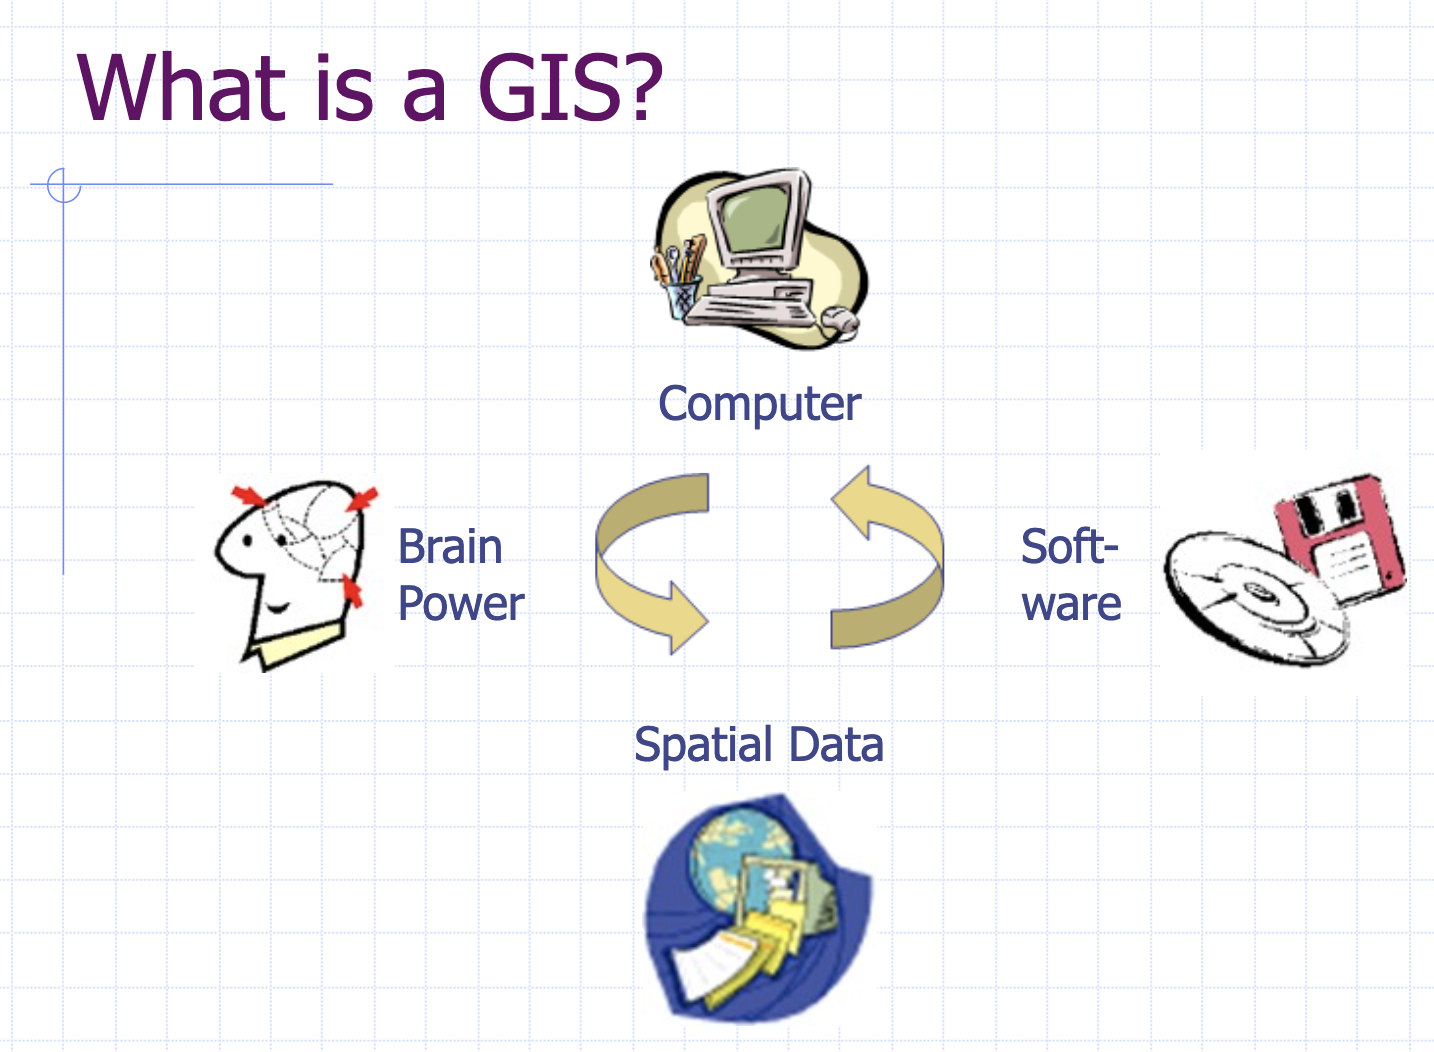
</div>

"<em><b>Um SIG é constituído por um conjunto de "ferramentas" especializadas em adquirir, armazenar, recuperar, transformar e emitir informações espaciais</b></em>. Esses dados geográficos descrevem objetos do mundo real em termos de posicionamento, com relação a um sistema de coordenadas, seus atributos não aparentes (como a cor, pH, custo, incidência de pragas, etc) e das relações topológicas existentes. Portanto, um SIG pode ser utilizado em estudos relativos ao meio ambiente e recursos naturais, na pesquisa da previsão de determinados fenômenos ou no apoio a decisões de planejamento, considerando a concepção de que os dados armazenados representam um modelo do mundo real, (Burrough, 1986).

<div>
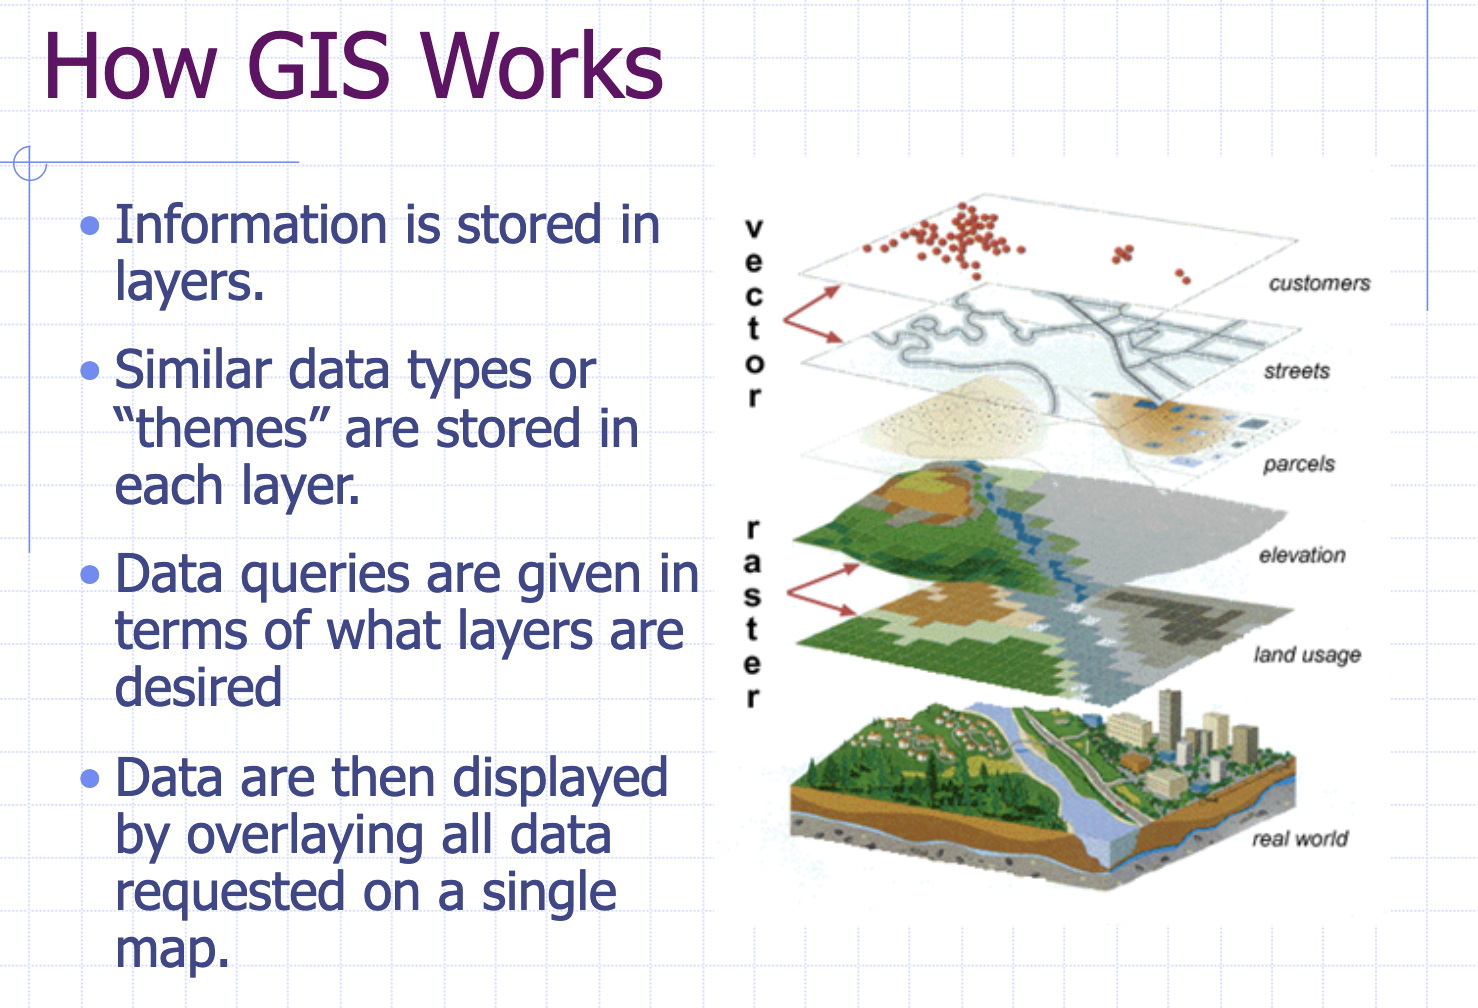
</div>

Um SIG pode, ainda, ser definido como um sistema provido de quatro grupos de aptidões para manusear dados georreferenciados: entrada, gerenciamento, manipulação e análise, e saída. Os dados são georreferenciados quando estes possuem basicamente duas características: dimensão física e localização espacial, (Aronoff 1989)." [DPI/INPE](http://www.dpi.inpe.br/gilberto/papers/analise.pdf)

Sendo o geoprocessamento: Processamento de dados espaciais > SIG > Informação espacial, pode-se dizer: **“Se onde é importante para seu negócio, então Geoprocessamento é sua ferramenta de trabalho”**

E como seria o trabalho de um cientista ou analista de GIS? De forma geral, o framework seria:

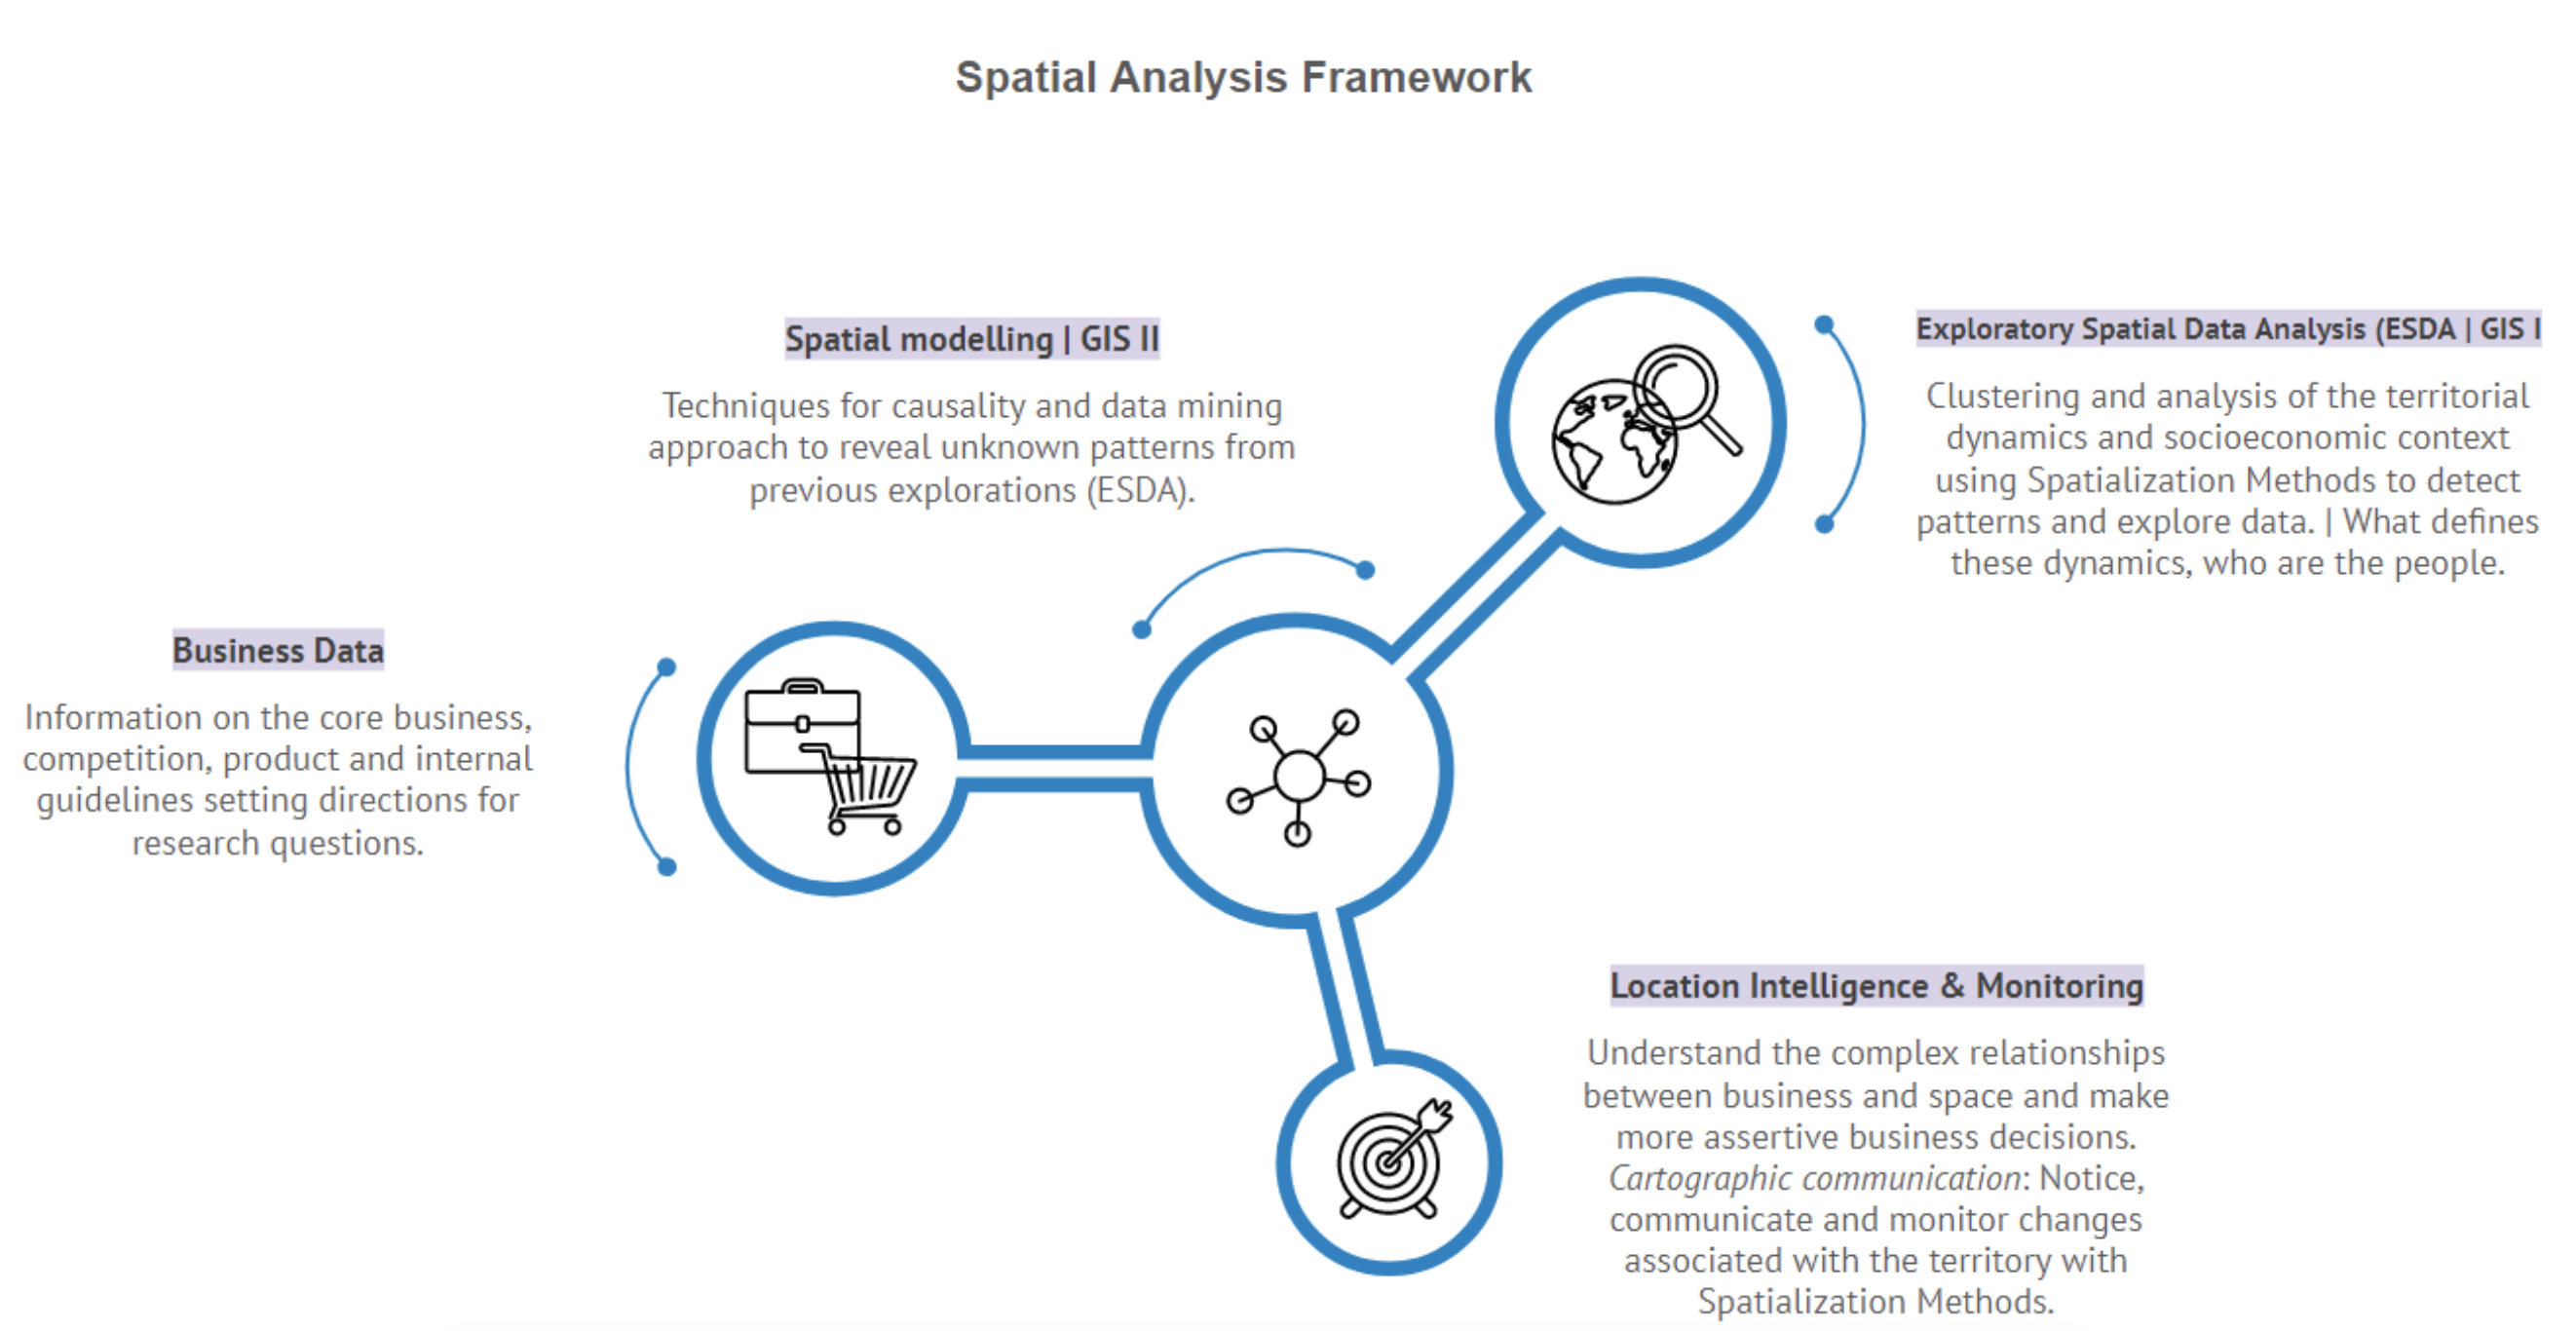

# Dados espaciais


Dados são registro de fenômenos que não passaram por tratamento. Os dados (geo) espaciais possuem uma localização na superfície terrestre.

##### Dados vetoriais

<p>
<div>
<img src="https://www.infoescola.com/wp-content/uploads/2010/03/dados-geograficos-2.jpg" width="500"/>
</div>

##### Dados matriciais ou raster

<p>
<div>
<img src="https://slideplayer.com.br/slide/1624245/5/images/29/Dados+espaciais%3A+representa%C3%A7%C3%A3o+matricial.jpg" width="800"/>
</div>


<div>
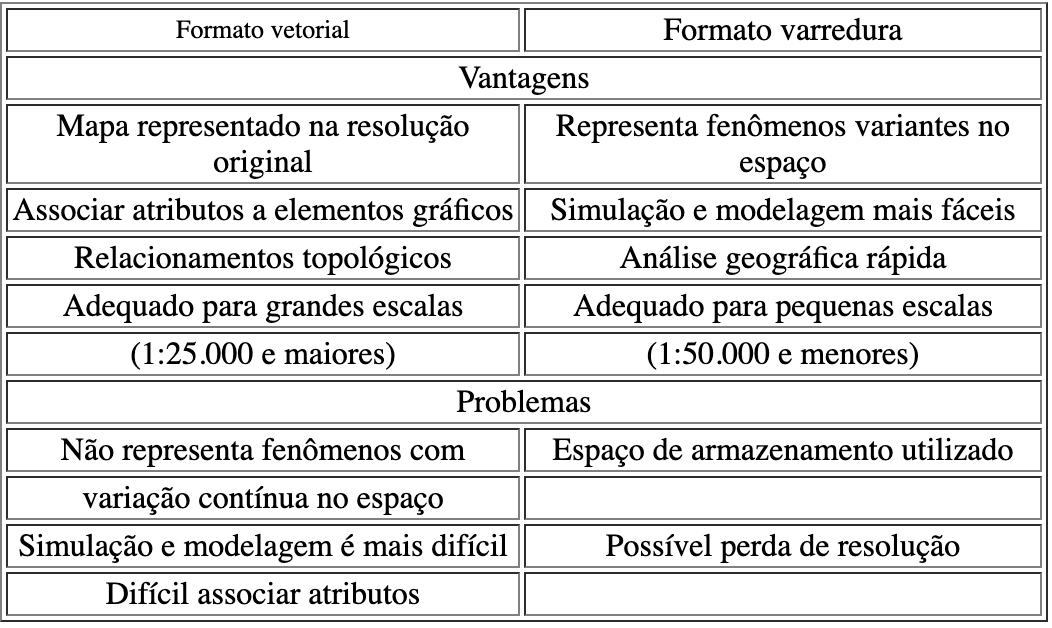
</div>

##### Dados de atributo/alfanuméricos 

<p>
<div>
<img src="https://www.lapig.iesa.ufg.br/lapig/cursos_online/qgis/tabela_de_atributos2.png" width="700"/>
</div>

**Dados de atributo**: são representados por códigos textuais, numéricos ou símbolos armazenados em tabelas, vinculados às feições gráficas que possuem refência espacial.

# Projeções cartográficas

___

- Como transformar uma superfície curva (superfície terrestre) em um plano?
- Como representar esses dados em um SIG de maneira a se aproximar da realidade?
- Objetivo da projeção: representar a superfície da terra em um papel ou tela de computador
- Todas as projeções causam distorções
- Tabela classificação das projeções

São classificadas quanto à superfície e quanto às propriedades:

###### Superfície
Podem ser projeções planas, cônicas ou cilíndricas, quando forem utilizadas as superfícies de um plano, cone ou cilindro como base para planificar a esfera terrestre. 

###### Propriedade
Com o objetivo de minimizar distorções de áreas, de ângulos ou de distâncias.

<p>
<div>
<img src="https://slideplayer.com.br/slide/332796/1/images/11/Exemplos+superf%C3%ADcie+de+proje%C3%A7%C3%A3o.jpg" width="900"/>
</div>

# Sistemas de coordenadas

Sistemas de coordenadas

- Cartesianas, plano-retangulares (projetadas) e geodésicas


# Modelos de representação da terra - Datum

Modelos de Representação da Terra

- Geóide
- Modelo Elipsóide (GRS80 no brasil)
- Datum:
    - Data planimétrico ou geodésico (horizontal)
        - é um ponto de origem para a refeência das coordenadas a nível local ou global
    - Data altimétrico
        - superfície de referência a partir da qual são calculadas todas as altitudes de uma área.
(colocar imagem datum)

Os Datum oficiais do Brasil atualmente:
    
Datum planimétrico: SIRGAS 2000, desde 2015
Datum altimétrico: Marégrafo de Imbituba/SC, desde 1958
    
Antigos Datum

Córrego Alegre
Astro Datum Chuá
SAD 69 (South American Datum)
SAD 69 (1996)

Porque usar o Datum de referencia? 
- deslocamento das coordenadas no plano
- usar o mesmo data para toda a base cartográfica do projeto no SIG

WGS 84



# Sistema de referência de coordenadas
Sistema de Referência de Cooderdenadas (SRC)

- Sistema de coordenadas geográficas + datum
- Sistema de coordenadas planas + projeção específica + datum

- Sistema de coordenadas planas UTM 
(exemplo: São Paulo ())

Referências


In [ ]:
Leaflet
Folium
Mplleaflet
GeoViews
Cartopy
Iris
Pedal
GeoAlchemy
GEOS
Proj 
Pyproj

Fiona
Shapely
Mapbox Rasterio

networkX
SQLAlchemy
Scikits-image
Pillow

